In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import function as f
import math
import test_moduls as test
import visualization
import pylab 
import scipy.stats as stats

In [2]:
beer_df = pd.read_csv('data/beer_and_brewery.csv')

# Investigation of IBU by Coast

Here we use a function that we created called coast_list() to identify each brewery as East Coast or West Coast. Breweries that are neither are ignored. We then use groupby() to take a quick look at summary statistics.

In [3]:
beer_df_by_coast = f.coast_list(beer_df)
beer_df_by_coast

,beer_name,brewery_name,ibu,state,region
21,Lower De Boom,21st Amendment Brewery,92.0,CA,wc
22,Fireside Chat,21st Amendment Brewery,45.0,CA,wc
24,Bitter American,21st Amendment Brewery,42.0,CA,wc
25,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc
26,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc
27,21st Amendment Watermelon Wheat Beer (2006),21st Amendment Brewery,17.0,CA,wc
28,21st Amendment IPA (2006),21st Amendment Brewery,70.0,CA,wc
29,Brew Free! or Die IPA (2008),21st Amendment Brewery,70.0,CA,wc
30,Brew Free! or Die IPA (2009),21st Amendment Brewery,70.0,CA,wc
31,Special Edition: Allies Win The War!,21st Amendment Brewery,52.0,CA,wc


In [4]:
beer_df_by_coast.head()

,beer_name,brewery_name,ibu,state,region
21,Lower De Boom,21st Amendment Brewery,92.0,CA,wc
22,Fireside Chat,21st Amendment Brewery,45.0,CA,wc
24,Bitter American,21st Amendment Brewery,42.0,CA,wc
25,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc
26,Hell or High Watermelon Wheat (2009),21st Amendment Brewery,17.0,CA,wc


In [5]:
groupby_coast = beer_df_by_coast.groupby(['region'])

In [6]:
groupby_coast.describe()

ibu                                                     
        count       mean        std  min    25%   50%   75%    max
region                                                            
ec      333.0  42.687688  25.884563  5.0  22.00  35.0  60.0  135.0
wc      428.0  46.665888  26.217038  4.0  23.75  40.0  68.0  138.0

# Complete t-test

## Divide the beers by Coast

In [7]:
ec_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'ec']
wc_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'wc']
wc_ibu = wc_beers['ibu']
ec_ibu = ec_beers['ibu']
wc_mean_ibu = wc_beers['ibu'].mean()
ec_mean_ibu = ec_beers['ibu'].mean()
wc_std_ibu = wc_beers['ibu'].std()
ec_std_ibu = ec_beers['ibu'].std()
wc_count = len(wc_beers)
ec_count = len(ec_beers)

In [8]:
# get the East Coast and West Coast Beers
ec_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'ec']
wc_beers = beer_df_by_coast.loc[beer_df_by_coast['region'] == 'wc']

## explore the mean, variance/standard divation and sample size 
print('\n' +'IBU matrix for East Coast Beers')
print('----------------')
print('East Coast mean:',round(ec_beers['ibu'].mean(),3))
print('East Coast standard deviation:', (ec_beers['ibu'].std()))
print('East Coast size:', len(ec_beers))
print('\n' +'IBU matrix for West Coast Beers')
print('----------------')
print('West Coast mean:', round(wc_beers['ibu'].mean(),3))
print('West Coast standard deviation:', round(wc_beers['ibu'].std(),3))
print('West Coast size:', len(wc_beers))


IBU matrix for East Coast Beers
----------------
East Coast mean: 42.688
East Coast standard deviation: 25.884562985733567
East Coast size: 333

IBU matrix for West Coast Beers
----------------
West Coast mean: 46.666
West Coast standard deviation: 26.217
West Coast size: 428


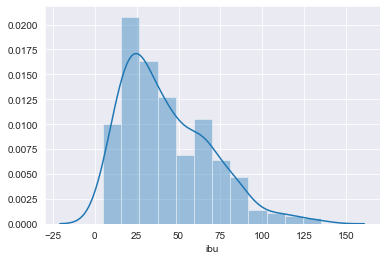

In [9]:
sns.distplot(ec_beers['ibu']);

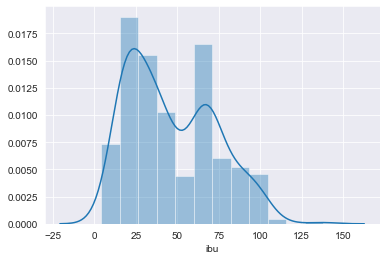

In [10]:
sns.distplot(wc_beers['ibu']);

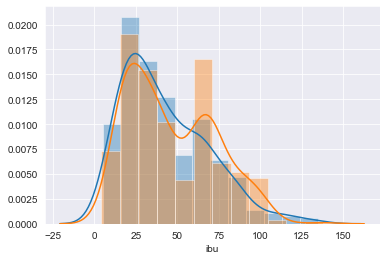

In [11]:
sns.distplot(ec_beers['ibu'])
sns.distplot(wc_beers['ibu']);

## 1. Set a null and alternative Hypotheses
### The Null Hypothesis

The null hypothesis is that there is no difference in IBUs between West Coast beers and East Coast beers.

>**$H_{0}$: The mean IBU difference between East Coast beers and West Coast beers is zero. i.e. $H_{0} = H_{1}$**

### The Alternate Hypothesis

>**$H_{1}$ (2-tailed): The mean difference between East Coast beers and West Coast beers is not zero.**

## 2. Choosing the significance level
The significance level ($\alpha$) is the probability of rejecting the null hypothesis when it is actually true. The general significance level of 0.05 or 5% risk is used for this hypothesis testing.

## 3. Calculate t-statistic 
Two independent samples t-test is used to compare the means of IBU between East Coast and West Coast beers.

The formula used to calculate the two-sample t-statistic and variance are: 

$$\large t = \frac{\bar{x}_{1} - \bar{x}_{2}}{\sqrt{s^{2}_{p} (\frac{1}{n_{1}} + \frac{1}{n_{2}}) }    }  $$

Where $s^{2}_{p}$ is the pooled sample variance, calculated as:

$$\large s^{2}_{p}  = \frac{(n_{1} -1)s^{2}_{1} +  (n_{2} -1)s^{2}_{2}}{n_{1} + n_{2} - 2}  $$

Where $s^{2}_{1}$ and $s^{2}_{2}$ are the variances for each sample given by the formula 
$$ \large s^{2} = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}{n-1} $$

In [12]:
t_stat = test.twosample_tstatistic(wc_ibu, ec_ibu)

Null hypohesis rejected. Results are statistically significant
         with t-statistic =  2.0882 critical t-value =  1.9631 and p-value =  0.0186
The groups contains 428 and  333 observations,
     having a mean of 46.6659 and 42.6877 respectivelly


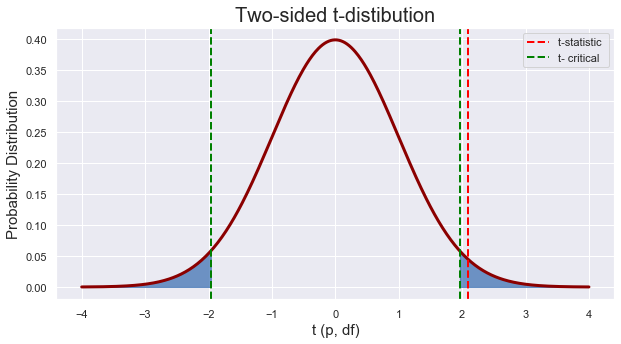

In [13]:
visualization.visualize_t(t_stat, wc_count, ec_count)

# Welch's t-test
Welch's t-test is the most common hypothesis test used in a two-sample test to infer that two populations have equal means. Welch's test is more reliable when the two samlples have unequal variances and/or unequal sample sizes.

Welch test degrees of freedom and t-statistic is calcualted using the following formaula. 
$$\text{df}  = \frac{\big(\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}\big)^{2}}{\frac{1}{n_{1}-1}\big(\frac{s_{1}^{2}}{n_{1}}\big)^{2} + \frac{1}{n_{2}-1}\big(\frac{s_{2}^{2}}{n_{2}}\big)^{2}}$$
Then T-statistics also known as Welch's t-test is given by: 

$$   t = \frac{(\bar{x}_{1} - \bar{x}_{2}) - D_{0}}{\sqrt{\frac{s_{1}^{2}}{n_{1}} + \frac{s_{2}^{2}}{n_{2}}}} = \frac{\bar{X_1}-\bar{X_2}}{\sqrt{se_1^2+se_2^2}}$$

In [14]:
welch_t = test.welch_t(wc_ibu, ec_ibu)
print("Welch's t-statistic is: ", round(welch_t,4))
welch_df = test.welch_df(wc_ibu, ec_ibu)
print("Welch's degrees of fredoom (df):", round(welch_df,4))

# converting this to p_value 
p_welch = test.p_value_welch_ttest(wc_ibu, ec_ibu, two_sided=True)

Welch's t-statistic is:  2.0915
Welch's degrees of fredoom (df): 717.8907
Null hypohesis rejected. Results are statistically significant
         with t-value =  2.0915 critical t-value =  1.647 and p-value =  0.0184
